#*Proyecto 1 "Relación Minutos Ingreso”**



**Nombres de los integrantes del grupo:**


*   CRISTIAN FELIPE BARBOSA TUNJANO
*   DAVID BORRERO DIAZ
*   MICHAEL ALEJANDRO GOMEZ RAMIREZ
*   NICOLAS SUAREZ


**Una explicación breve del problema teniendo en cuenta lo siguiente:**

Este estudio tiene como objetivo investigar la relación entre el total de minutos utilizados por los clientes y sus ingresos totales en una empresa de telecomunicaciones. Utilizando la base Credito_dias.csv, emplearemos un enfoque que combina análisis estadístico, descriptivo, visualización de datos y técnicas de modelado predictivo como la correlación y regresión lineal. Además, consideraremos variables adicionales como la posesión de tarjeta de crédito y la antigüedad. Este enfoque nos permitirá identificar posibles relaciones lineales entre las variables de estudio, sino que también proporcionará valiosos insights para la toma de decisiones estratégicas en la mejora de productos y campañas publicitarias de la empresa.

In [333]:
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/Izainea/seminario-de-programacion/master/Cuadernos/Clase%202/Bases/Credito_dias.csv")

In [334]:
#borraremos customer id que no deberia ser una variable de interes para el ejercicio
df = df.drop(['Customer_ID'],axis=1)

##Descripción Campos

In [335]:
df.shape

(10000, 4)

##Exploratorio totmou

In [336]:
#Contamos valores nulos
df['totmou'].isnull().sum()

0

In [337]:
df['totmou'].describe()

count     10000.000000
mean       7692.804866
std        8657.917883
min           0.000000
25%        2576.000000
50%        5262.000000
75%        9823.250000
max      163264.176700
Name: totmou, dtype: float64

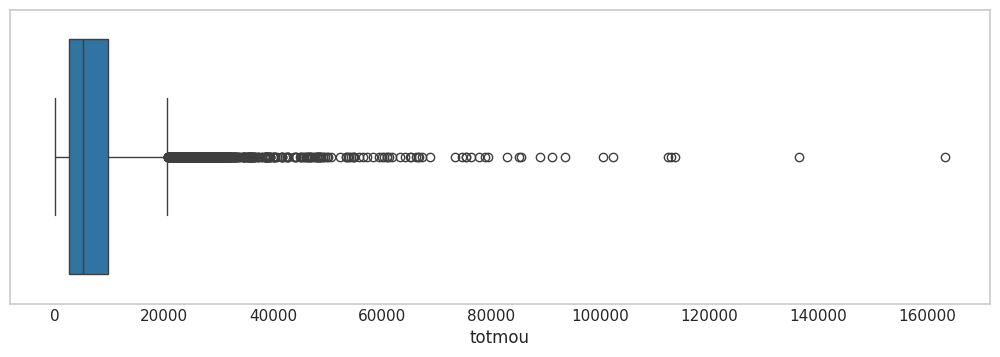

In [338]:
plt.figure(figsize=(10,3))
sns.boxplot(df['totmou'],orient='h')
plt.show()

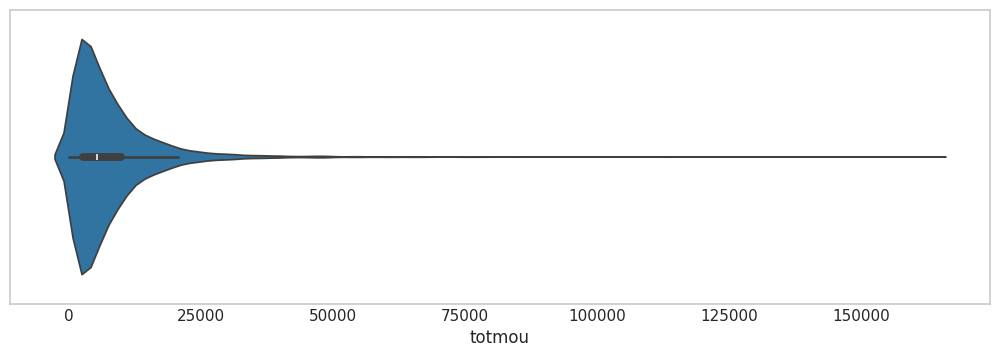

In [339]:
plt.figure(figsize=(10,3))
sns.violinplot(df['totmou'],orient='h')
plt.show()

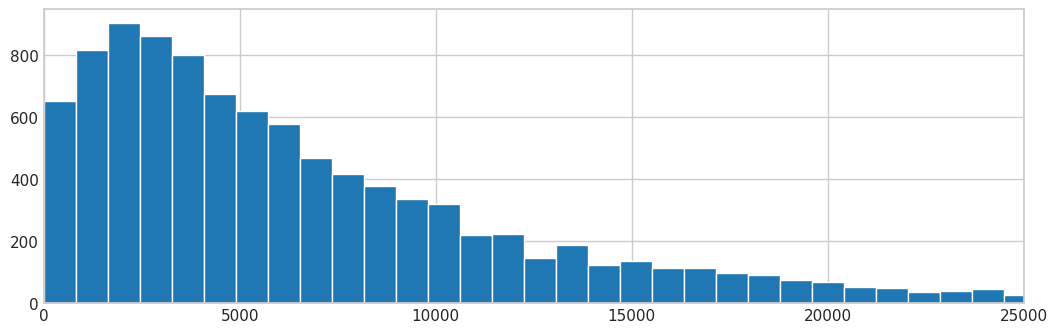

In [340]:
df['totmou'].hist(bins=200,figsize=(10,3))
plt.xlim(0, 25000)
plt.show()

In [341]:
#Exploratorioto

##Exploratorio tot rev

In [342]:
#Contamos valores nulos
df['totrev'].isnull().sum()

0

In [343]:
df['totrev'].describe()

count    10000.000000
mean      1042.133807
std        857.144895
min         11.100000
25%        526.787500
50%        820.235000
75%       1272.975000
max      13426.600000
Name: totrev, dtype: float64

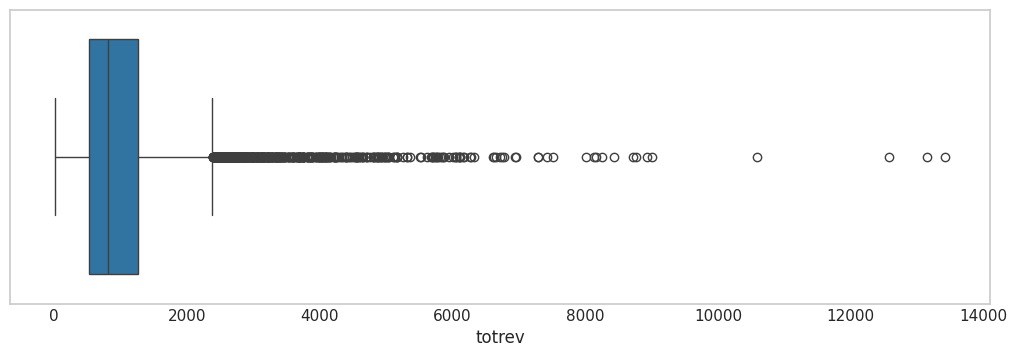

In [344]:
plt.figure(figsize=(10,3))
sns.boxplot(df['totrev'],orient='h')
plt.show()

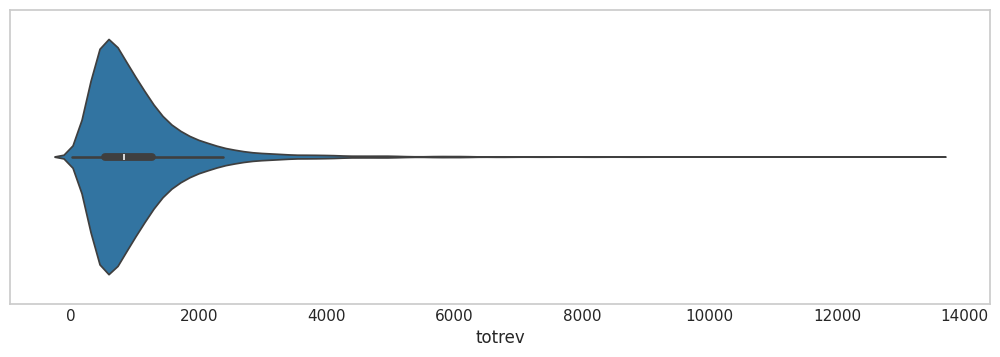

In [345]:
plt.figure(figsize=(10,3))
sns.violinplot(df['totrev'],orient='h')
plt.show()

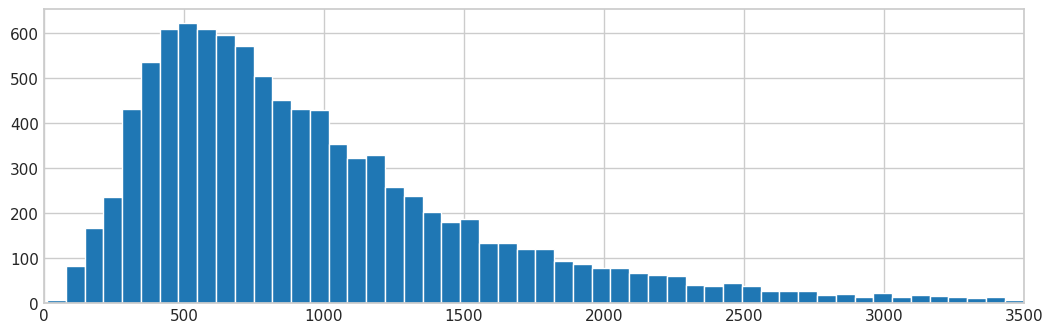

In [346]:
df['totrev'].hist(bins=200,figsize=(10,3))
plt.xlim(0, 3500)
plt.show()

##Exploratorioeqpdays

In [347]:
#Contamos valores nulos
df['eqpdays'].isnull().sum()

0

In [348]:
df['eqpdays'].describe()

count    10000.000000
mean       386.794500
std        252.720196
min         -5.000000
25%        210.000000
50%        338.000000
75%        522.000000
max       1823.000000
Name: eqpdays, dtype: float64

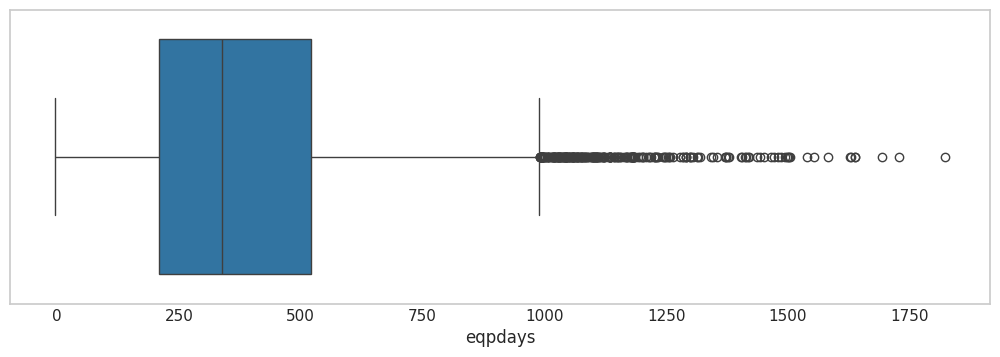

In [375]:
plt.figure(figsize=(10,3))
sns.boxplot(df['eqpdays'],orient='h')
#plt.axvline(x=0, color='red', linestyle='-.', label='Línea en 0')
plt.show()

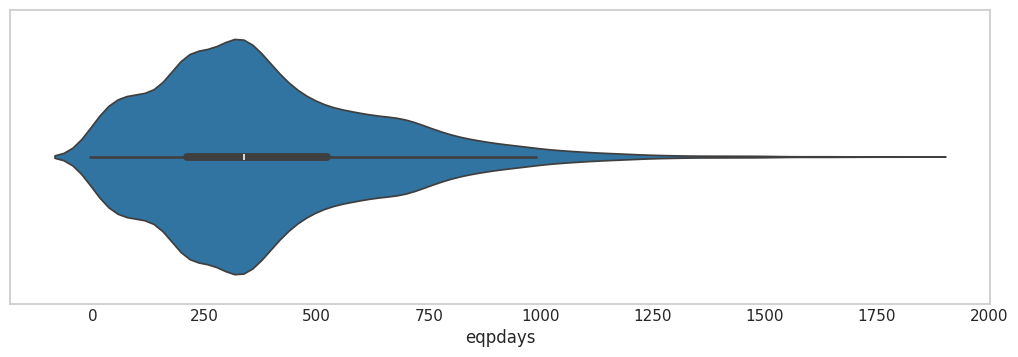

In [376]:
plt.figure(figsize=(10,3))
sns.violinplot(df['eqpdays'],orient='h')

plt.show()

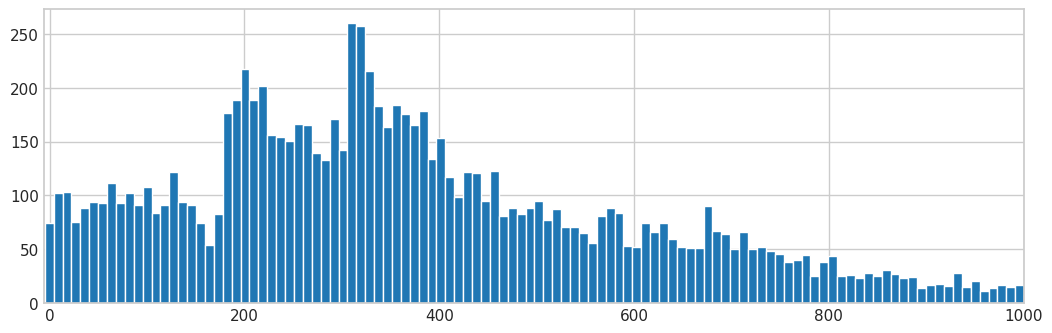

In [378]:
df['eqpdays'].hist(bins=200,figsize=(10,3))
plt.xlim(-6, 1000)
plt.show()

##Graficos

###Histograma

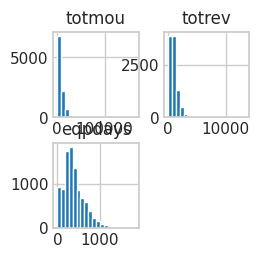

In [352]:
df.hist(bins=20)
plt.show()

###Diagrama de Barras

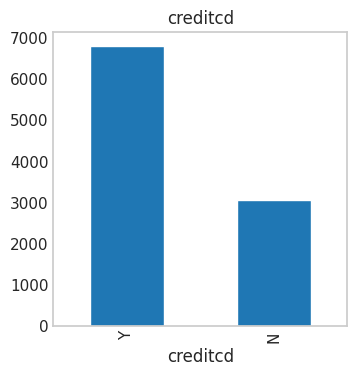

In [353]:
df['creditcd'].value_counts().plot(kind='bar',figsize=(3,3))
plt.title('creditcd')
plt.show()

###Distribución

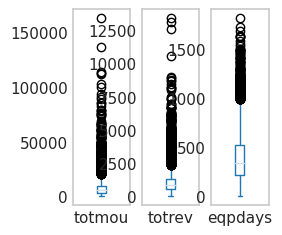

In [354]:
df.drop(columns=['creditcd']).plot(kind='box',subplots=True)
plt.show()

Vemos las distrubuciones de los campos
*dado el comportamiento del campo tot mou es dificil sabeer si los numeros más altos son atipicos o no

###Pairplot

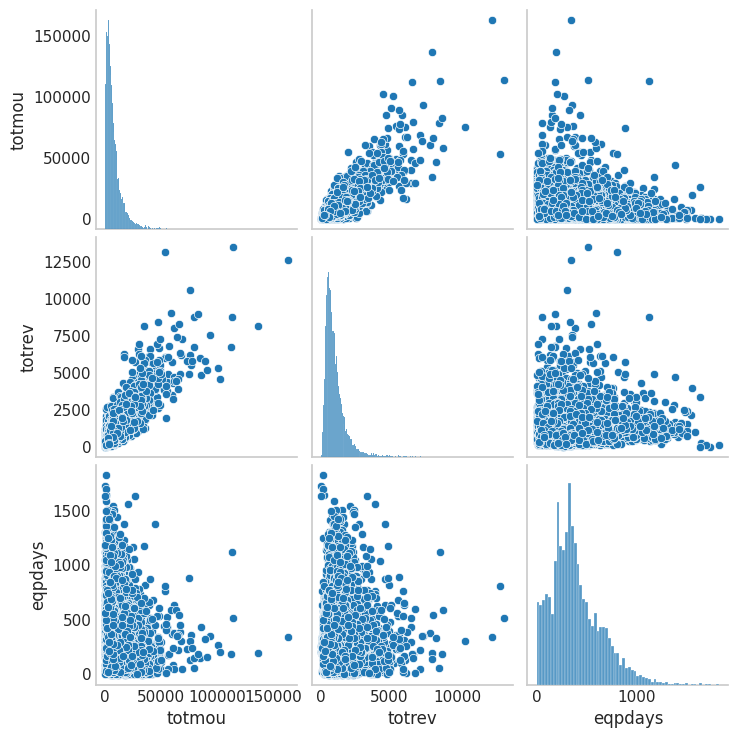

In [355]:
sns.pairplot(df)
plt.show()

<Axes: >

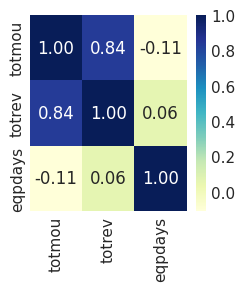

In [356]:
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(),annot=True,fmt=".2f",cmap="YlGnBu")

In [357]:
df.describe(include='all')

,totmou,totrev,creditcd,eqpdays
count,10000.000000,10000.000000,9848,10000.000000
unique,NaN,NaN,2,NaN
top,NaN,NaN,Y,NaN
freq,NaN,NaN,6796,NaN
mean,7692.804866,1042.133807,NaN,386.794500
std,8657.917883,857.144895,NaN,252.720196
min,0.000000,11.100000,NaN,-5.000000
25%,2576.000000,526.787500,NaN,210.000000
50%,5262.000000,820.235000,NaN,338.000000
75%,9823.250000,1272.975000,NaN,522.000000


notamos que el valor creditcd no tiene algunos registros.

*Notamos que la variable eqp days tiene un valor minimo de -5 lo cual no tiene sentido
*hay una desviación estandar altisima en todos los campos

notamos que las variables que tienen